# Markov Chain Monte Carlo Simulation
## Particles in a Box with Lennard-Jones Potential

This notebook demonstrates the implementation and application of MCMC methods to simulate particles interacting via the Lennard-Jones potential.

---

## 1. Introduction

### The Lennard-Jones Potential

The Lennard-Jones (LJ) potential models the interaction between neutral atoms or molecules:

```
V(r) = 4ε[(σ/r)^12 - (σ/r)^6]
```

where:
- `r` is the distance between particles
- `ε` (epsilon) is the depth of the potential well
- `σ` (sigma) is the distance at which V(r) = 0

### Metropolis-Hastings Algorithm

1. Start with an initial configuration
2. Propose a random move for a particle
3. Calculate energy change ΔE
4. Accept move with probability: min(1, exp(-βΔE)) where β = 1/T
5. Repeat for many steps

## 2. Setup and Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mcmc_lj_simulation as mcmc
import visualize_simulation as viz

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("✓ Imports successful!")

✓ Imports successful!


## 3. Understanding the Lennard-Jones Potential

Let's visualize the LJ potential to understand particle interactions.

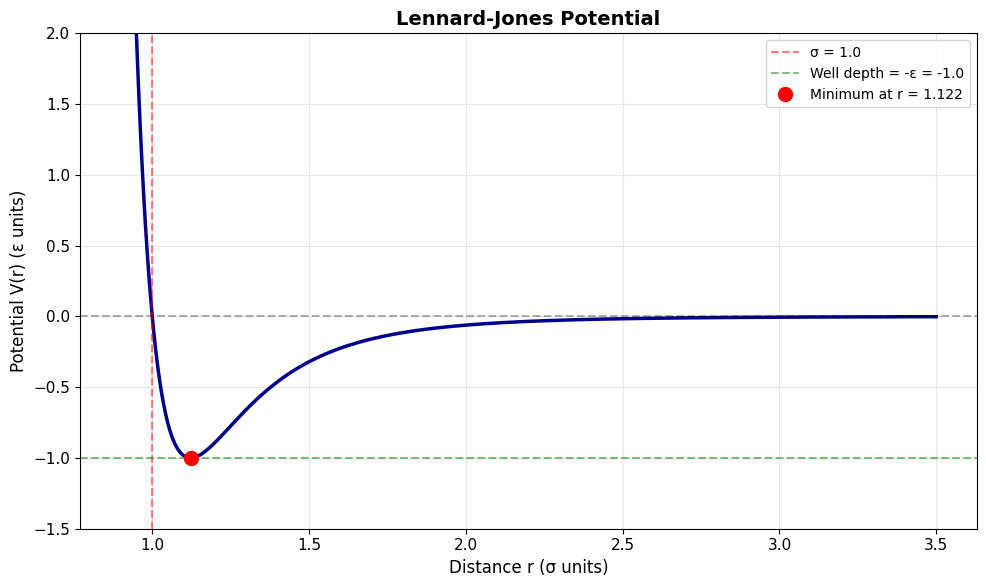

Minimum occurs at r = 1.1225σ with V = -ε
Repulsive at short distances (r < σ)
Attractive at intermediate distances (σ < r < ~2.5σ)


In [17]:
# Plot the Lennard-Jones potential
epsilon = 1.0
sigma = 1.0

r = np.linspace(0.9, 3.5, 500)
V = 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

plt.figure(figsize=(10, 6))
plt.plot(r, V, linewidth=2.5, color='darkblue')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=sigma, color='red', linestyle='--', alpha=0.5, label=f'σ = {sigma}')
plt.axhline(y=-epsilon, color='green', linestyle='--', alpha=0.5, label=f'Well depth = -ε = {-epsilon}')

# Mark minimum
r_min = sigma * 2**(1/6)
V_min = -epsilon
plt.plot(r_min, V_min, 'ro', markersize=10, label=f'Minimum at r = {r_min:.3f}')

plt.xlabel('Distance r (σ units)', fontsize=12)
plt.ylabel('Potential V(r) (ε units)', fontsize=12)
plt.title('Lennard-Jones Potential', fontsize=14, fontweight='bold')
plt.ylim([-1.5, 2])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"Minimum occurs at r = {r_min:.4f}σ with V = -ε")
print(f"Repulsive at short distances (r < σ)")
print(f"Attractive at intermediate distances (σ < r < ~2.5σ)")

## 4. Basic MCMC Simulation

Let's run a basic simulation with 20 particles.

In [18]:
# Configure simulation parameters
params = mcmc.SimulationParameters(
    n_particles=50,
    box_length=10.0,
    temperature=1.0,
    epsilon=1.0,
    sigma=1.0,
    max_displacement=0.3,
    n_steps=10000,
    equilibration_steps=2000
)

print("Simulation Parameters:")
print(f"  Number of particles: {params.n_particles}")
print(f"  Box length: {params.box_length}")
print(f"  Temperature: {params.temperature}")
print(f"  Density: {params.n_particles / params.box_length**3:.4f}")
print(f"  Total steps: {params.n_steps}")
print(f"  Equilibration steps: {params.equilibration_steps}")

Simulation Parameters:
  Number of particles: 50
  Box length: 10.0
  Temperature: 1.0
  Density: 0.0500
  Total steps: 10000
  Equilibration steps: 2000


In [19]:
# Create and run simulation
system = mcmc.LennardJonesSystem(params)
results = system.run_simulation(verbose=True)

Starting MCMC simulation...
Particles: 50
Temperature: 1.0
Steps: 10000
Equilibration: 2000

Equilibration phase...
Production phase...
Production phase...
Step 1000/10000, Energy: -20.94, Acceptance: 0.779
Step 1000/10000, Energy: -20.94, Acceptance: 0.779
Step 2000/10000, Energy: -26.30, Acceptance: 0.786
Step 2000/10000, Energy: -26.30, Acceptance: 0.786
Step 3000/10000, Energy: -31.18, Acceptance: 0.779
Step 3000/10000, Energy: -31.18, Acceptance: 0.779
Step 4000/10000, Energy: -24.51, Acceptance: 0.783
Step 4000/10000, Energy: -24.51, Acceptance: 0.783
Step 5000/10000, Energy: -25.89, Acceptance: 0.779
Step 5000/10000, Energy: -25.89, Acceptance: 0.779
Step 6000/10000, Energy: -21.22, Acceptance: 0.786
Step 6000/10000, Energy: -21.22, Acceptance: 0.786
Step 7000/10000, Energy: -21.78, Acceptance: 0.793
Step 7000/10000, Energy: -21.78, Acceptance: 0.793
Step 8000/10000, Energy: -17.66, Acceptance: 0.801
Step 8000/10000, Energy: -17.66, Acceptance: 0.801
Step 9000/10000, Energy: -25

### Results Summary

In [20]:
print("="*60)
print("SIMULATION RESULTS")
print("="*60)
print(f"Mean energy:              {results['mean_energy']:.4f} ε")
print(f"Energy std deviation:     {results['std_energy']:.4f} ε")
print(f"Energy per particle:      {results['mean_energy']/params.n_particles:.4f} ε")
print(f"Final energy:             {results['energies'][-1]:.4f} ε")
print(f"Acceptance rate:          {results['acceptance_rate']:.3f}")
print("="*60)

# Optimal acceptance rate is typically 30-50%
if 0.3 <= results['acceptance_rate'] <= 0.5:
    print("✓ Acceptance rate is in optimal range (30-50%)")
elif results['acceptance_rate'] < 0.3:
    print("⚠ Acceptance rate is low. Consider reducing max_displacement.")
else:
    print("⚠ Acceptance rate is high. Consider increasing max_displacement.")

SIMULATION RESULTS
Mean energy:              -24.8279 ε
Energy std deviation:     4.2806 ε
Energy per particle:      -0.4966 ε
Final energy:             -26.6087 ε
Acceptance rate:          0.803
⚠ Acceptance rate is high. Consider increasing max_displacement.


## 5. Visualize Energy Evolution

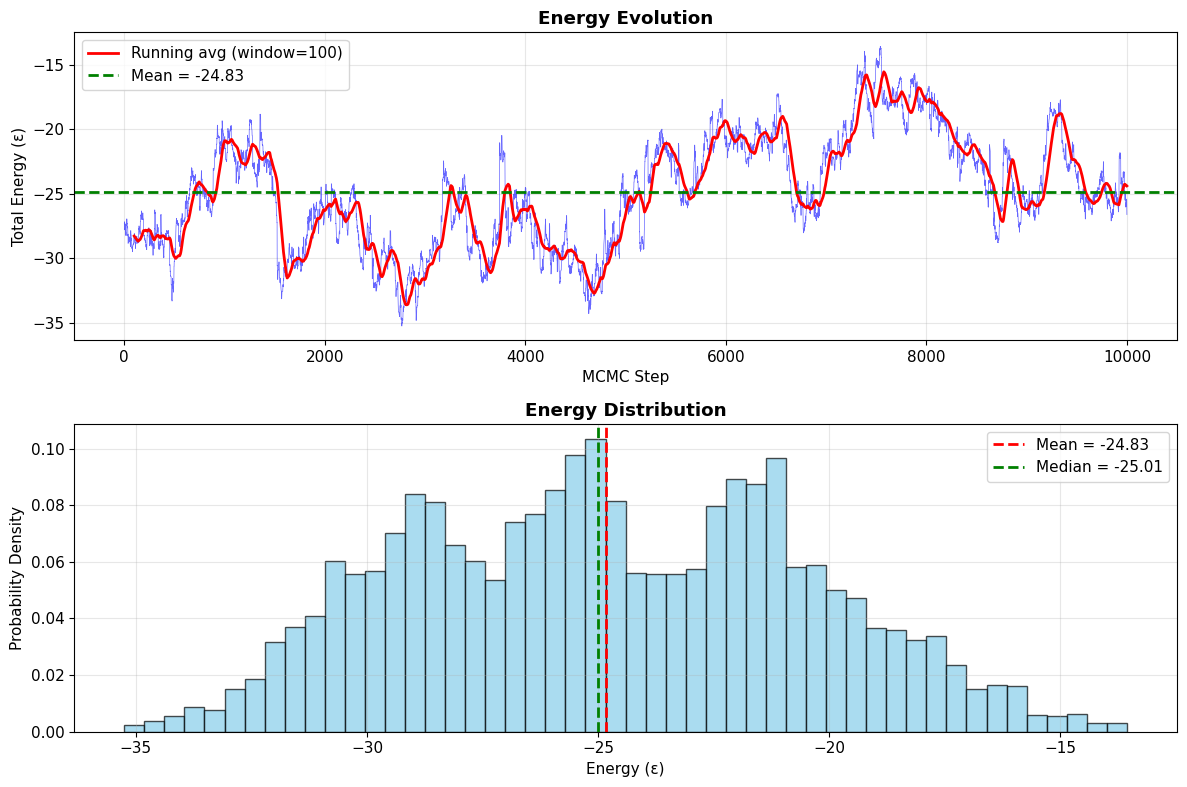

In [21]:
energies = results['energies']
steps = np.arange(len(energies))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Energy trace
ax1.plot(steps, energies, alpha=0.6, linewidth=0.5, color='blue')
window = 100
running_avg = np.convolve(energies, np.ones(window)/window, mode='valid')
ax1.plot(steps[window-1:], running_avg, 'r-', linewidth=2, label=f'Running avg (window={window})')
ax1.axhline(y=np.mean(energies), color='green', linestyle='--', linewidth=2, label=f'Mean = {np.mean(energies):.2f}')
ax1.set_xlabel('MCMC Step')
ax1.set_ylabel('Total Energy (ε)')
ax1.set_title('Energy Evolution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Energy histogram
ax2.hist(energies, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(np.mean(energies), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(energies):.2f}')
ax2.axvline(np.median(energies), color='green', linestyle='--', linewidth=2, label=f'Median = {np.median(energies):.2f}')
ax2.set_xlabel('Energy (ε)')
ax2.set_ylabel('Probability Density')
ax2.set_title('Energy Distribution', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Visualize Particle Configuration

### 3D View

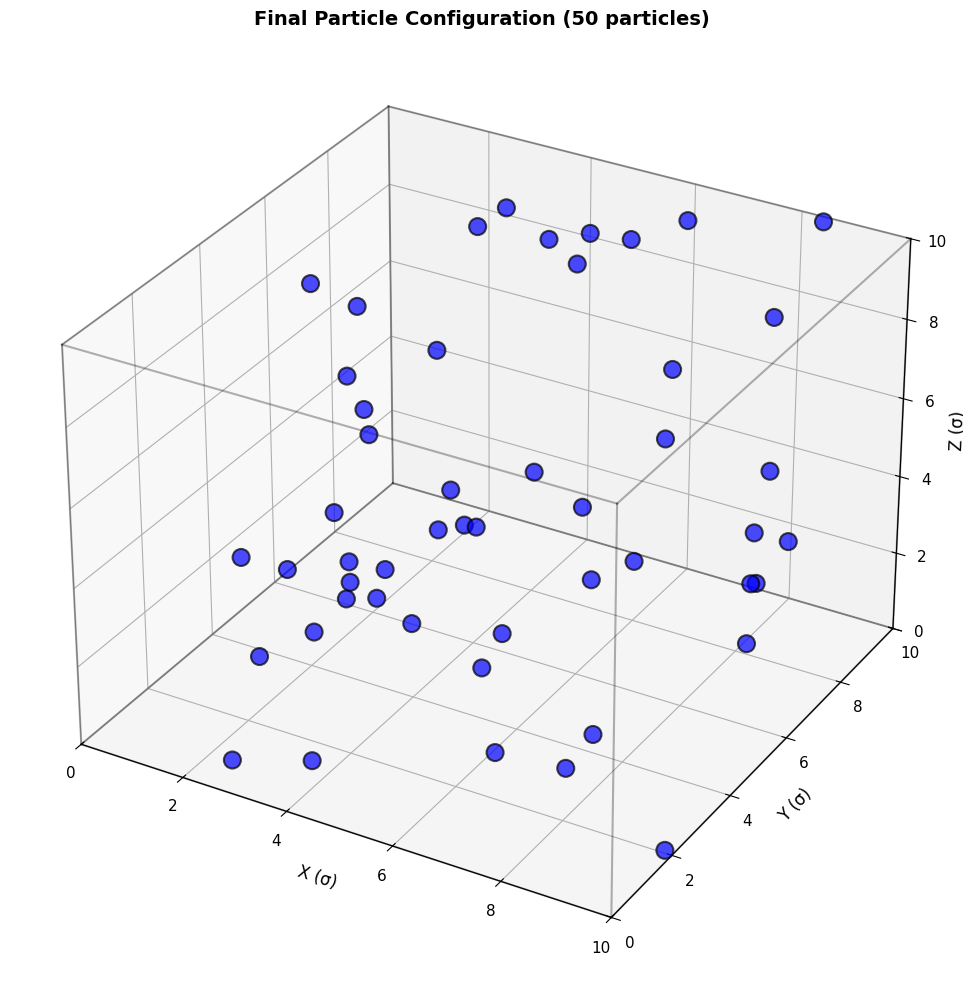

In [22]:
positions = results['final_positions']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot particles
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], 
          c='blue', marker='o', s=150, alpha=0.7, edgecolors='black', linewidth=1.5)

# Draw box
box_length = params.box_length
corners = np.array([
    [0, 0, 0], [box_length, 0, 0], [box_length, box_length, 0], [0, box_length, 0],
    [0, 0, box_length], [box_length, 0, box_length], 
    [box_length, box_length, box_length], [0, box_length, box_length]
])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

for edge in edges:
    points = corners[edge]
    ax.plot3D(*points.T, 'k-', alpha=0.3, linewidth=1.5)

ax.set_xlabel('X (σ)', fontsize=12)
ax.set_ylabel('Y (σ)', fontsize=12)
ax.set_zlabel('Z (σ)', fontsize=12)
ax.set_title(f'Final Particle Configuration ({params.n_particles} particles)', fontsize=14, fontweight='bold')
ax.set_xlim([0, box_length])
ax.set_ylim([0, box_length])
ax.set_zlim([0, box_length])

plt.tight_layout()
plt.show()

### 2D Projection

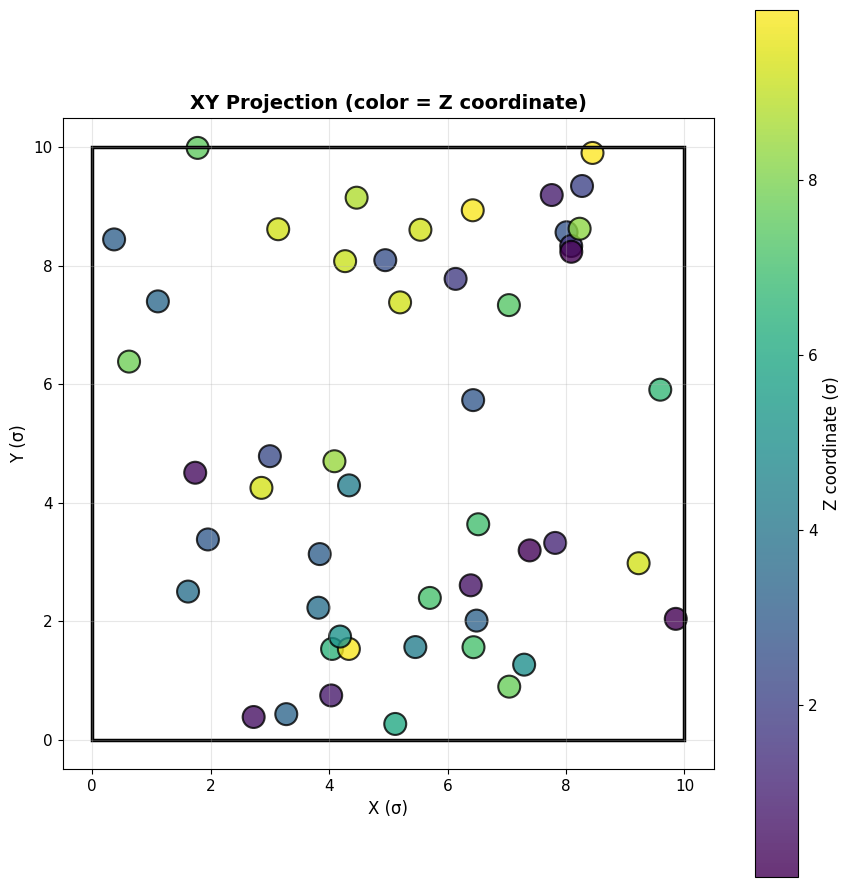

In [23]:
fig, ax = plt.subplots(figsize=(9, 9))

scatter = ax.scatter(positions[:, 0], positions[:, 1], 
                    c=positions[:, 2], cmap='viridis',
                    s=250, alpha=0.8, edgecolors='black', linewidth=1.5)

# Draw box
box = plt.Rectangle((0, 0), box_length, box_length, 
                    fill=False, edgecolor='black', linewidth=2.5)
ax.add_patch(box)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Z coordinate (σ)', fontsize=12)

ax.set_xlabel('X (σ)', fontsize=12)
ax.set_ylabel('Y (σ)', fontsize=12)
ax.set_title('XY Projection (color = Z coordinate)', fontsize=14, fontweight='bold')
ax.set_xlim([-0.5, box_length + 0.5])
ax.set_ylim([-0.5, box_length + 0.5])
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Radial Distribution Function

The radial distribution function g(r) measures how particle density varies as a function of distance from a reference particle.

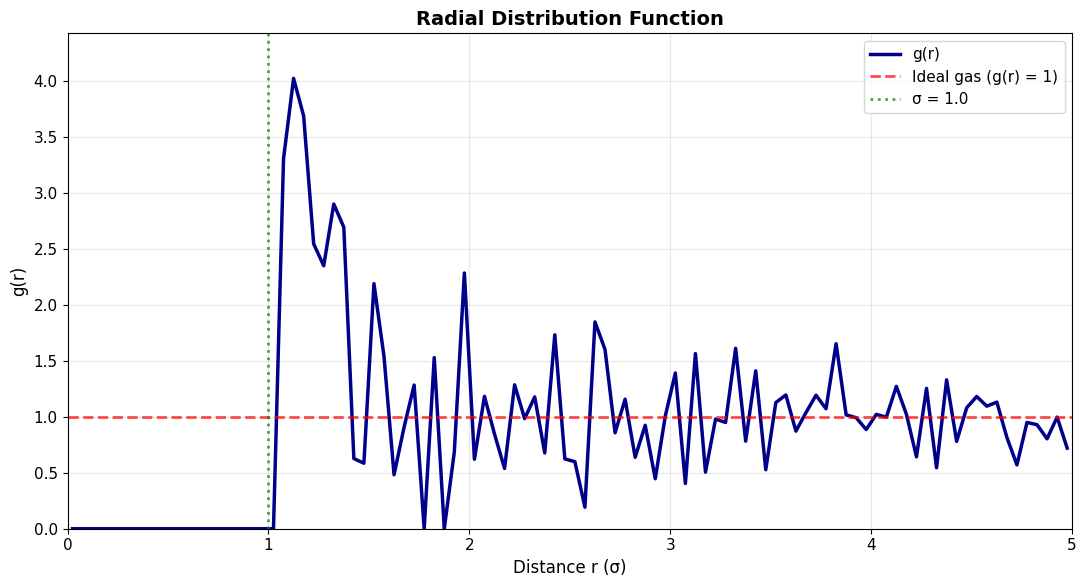


Interpretation:
  • g(r) ≈ 0 for r < σ: Hard-core repulsion prevents close approach
  • g(r) > 1 near σ: Particles prefer to be near minimum of potential
  • g(r) → 1 for large r: No correlation at large distances


In [24]:
r, g = system.get_radial_distribution_function(n_bins=100)

plt.figure(figsize=(11, 6))
plt.plot(r, g, linewidth=2.5, color='darkblue', label='g(r)')
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
           label='Ideal gas (g(r) = 1)', alpha=0.7)
plt.axvline(x=params.sigma, color='green', linestyle=':', linewidth=2,
           label=f'σ = {params.sigma}', alpha=0.7)

plt.xlabel('Distance r (σ)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Radial Distribution Function', fontsize=14, fontweight='bold')
plt.xlim([0, box_length/2])
plt.ylim([0, max(3, np.max(g) * 1.1)])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  • g(r) ≈ 0 for r < σ: Hard-core repulsion prevents close approach")
print("  • g(r) > 1 near σ: Particles prefer to be near minimum of potential")
print("  • g(r) → 1 for large r: No correlation at large distances")

## 8. Temperature Effects

Let's explore how temperature affects the system behavior.

Running simulations at different temperatures...

Temperature T = 1...
  Mean E = -4.93, E/N = -0.197
  Acceptance = 0.929

Temperature T = 5...
  Mean E = -4.93, E/N = -0.197
  Acceptance = 0.929

Temperature T = 5...
  Mean E = -3.13, E/N = -0.125
  Acceptance = 0.979

Temperature T = 10...
  Mean E = -3.13, E/N = -0.125
  Acceptance = 0.979

Temperature T = 10...
  Mean E = -1.40, E/N = -0.056
  Acceptance = 0.980

  Mean E = -1.40, E/N = -0.056
  Acceptance = 0.980



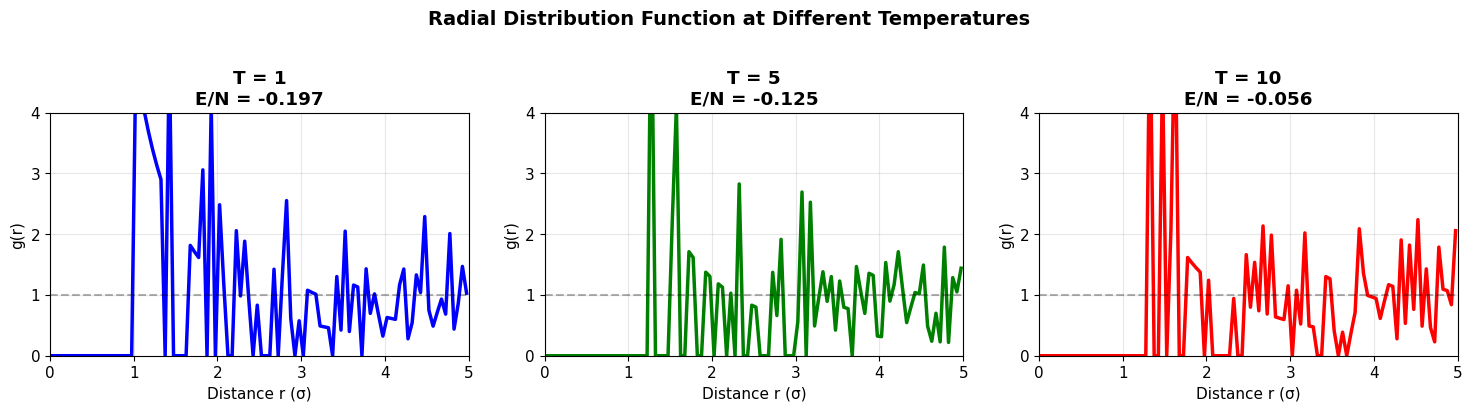


Observations:
  • Lower T: More structured g(r) with sharper peaks (more solid-like)
  • Higher T: Smoother g(r) approaching ideal gas (more gas-like)


In [25]:
temperatures = [1, 5, 10]
colors = ['blue', 'green', 'red']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

print("Running simulations at different temperatures...\n")

for idx, (T, color) in enumerate(zip(temperatures, colors)):
    print(f"Temperature T = {T}...")
    np.random.seed(42)
    
    params_temp = mcmc.SimulationParameters(
        n_particles=25,
        box_length=10.0,
        temperature=T,
        max_displacement=0.25,
        n_steps=6000,
        equilibration_steps=1500
    )
    
    sys_temp = mcmc.LennardJonesSystem(params_temp)
    res_temp = sys_temp.run_simulation(verbose=False)
    
    r_temp, g_temp = sys_temp.get_radial_distribution_function()
    
    axes[idx].plot(r_temp, g_temp, linewidth=2.5, color=color)
    axes[idx].axhline(y=1.0, color='black', linestyle='--', alpha=0.3)
    axes[idx].set_xlabel('Distance r (σ)', fontsize=11)
    axes[idx].set_ylabel('g(r)', fontsize=11)
    axes[idx].set_title(f'T = {T}\nE/N = {res_temp["mean_energy"]/25:.3f}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim([0, 5])
    axes[idx].set_ylim([0, 4])
    
    print(f"  Mean E = {res_temp['mean_energy']:.2f}, E/N = {res_temp['mean_energy']/25:.3f}")
    print(f"  Acceptance = {res_temp['acceptance_rate']:.3f}\n")

plt.suptitle('Radial Distribution Function at Different Temperatures', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nObservations:")
print("  • Lower T: More structured g(r) with sharper peaks (more solid-like)")
print("  • Higher T: Smoother g(r) approaching ideal gas (more gas-like)")

## 9. Convergence and Equilibration Analysis

Understanding when the system reaches equilibrium is crucial for reliable results.

In [26]:
np.random.seed(123)

params_conv = mcmc.SimulationParameters(
    n_particles=20,
    box_length=10.0,
    temperature=1.0,
    max_displacement=0.3,
    n_steps=12000,
    equilibration_steps=0  # Track from beginning
)

system_conv = mcmc.LennardJonesSystem(params_conv)

print("Running simulation to analyze convergence...")
energies_conv = []
for step in range(params_conv.n_steps):
    system_conv.metropolis_step()
    energies_conv.append(system_conv.calculate_total_energy())
    if (step + 1) % 3000 == 0:
        print(f"  Step {step + 1}/{params_conv.n_steps}")

energies_conv = np.array(energies_conv)
print("Done!\n")

Running simulation to analyze convergence...
  Step 3000/12000
  Step 3000/12000
  Step 6000/12000
  Step 6000/12000
  Step 9000/12000
  Step 9000/12000
  Step 12000/12000
Done!

  Step 12000/12000
Done!



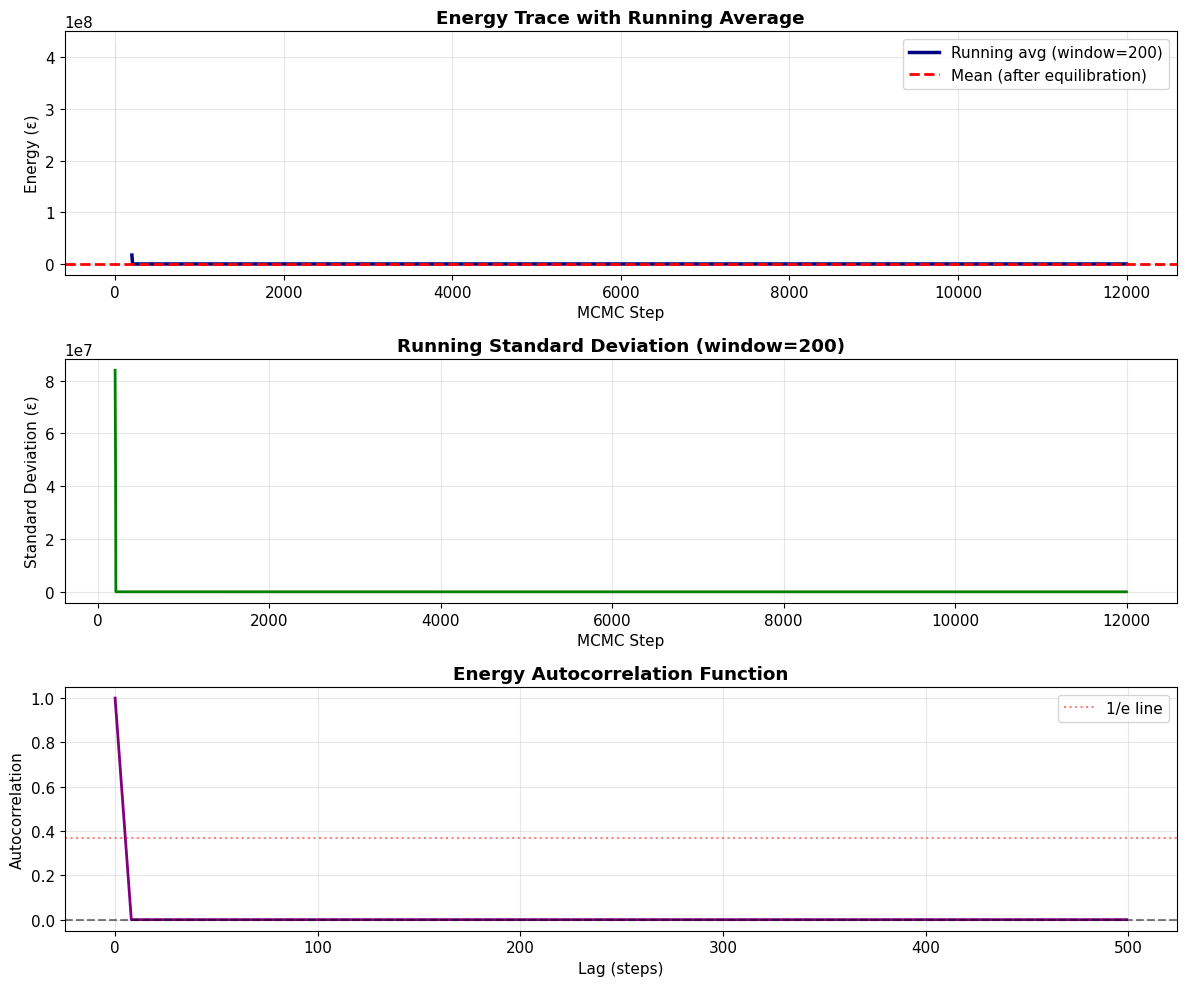

Correlation time: ~6 steps
Effective sample size: ~2000


In [27]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

steps = np.arange(len(energies_conv))

# Plot 1: Full trace with running average
window = 200
running_avg_conv = np.convolve(energies_conv, np.ones(window)/window, mode='valid')

axes[0].plot(steps, energies_conv, alpha=0.5, linewidth=0.5, color='lightblue')
axes[0].plot(steps[window-1:], running_avg_conv, 'navy', linewidth=2.5, 
            label=f'Running avg (window={window})')
axes[0].axhline(y=np.mean(energies_conv[3000:]), color='red', linestyle='--', 
               linewidth=2, label='Mean (after equilibration)')
axes[0].set_xlabel('MCMC Step', fontsize=11)
axes[0].set_ylabel('Energy (ε)', fontsize=11)
axes[0].set_title('Energy Trace with Running Average', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Running standard deviation
running_std = []
for i in range(window, len(energies_conv)):
    running_std.append(np.std(energies_conv[i-window:i]))

axes[1].plot(steps[window:], running_std, linewidth=2, color='green')
axes[1].set_xlabel('MCMC Step', fontsize=11)
axes[1].set_ylabel('Standard Deviation (ε)', fontsize=11)
axes[1].set_title(f'Running Standard Deviation (window={window})', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot 3: Energy autocorrelation
max_lag = 500
energy_centered = energies_conv - np.mean(energies_conv)
autocorr = np.correlate(energy_centered, energy_centered, mode='full')
autocorr = autocorr[len(autocorr)//2:]
autocorr = autocorr[:max_lag] / autocorr[0]

axes[2].plot(autocorr, linewidth=2, color='purple')
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2].axhline(y=1/np.e, color='red', linestyle=':', alpha=0.5, label='1/e line')
axes[2].set_xlabel('Lag (steps)', fontsize=11)
axes[2].set_ylabel('Autocorrelation', fontsize=11)
axes[2].set_title('Energy Autocorrelation Function', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find correlation time
correlation_time_idx = np.where(autocorr < 1/np.e)[0]
if len(correlation_time_idx) > 0:
    correlation_time = correlation_time_idx[0]
    print(f"Correlation time: ~{correlation_time} steps")
    print(f"Effective sample size: ~{len(energies_conv) / correlation_time:.0f}")
else:
    print("Correlation persists beyond measured lag")

## 10. Pairwise Distance Analysis

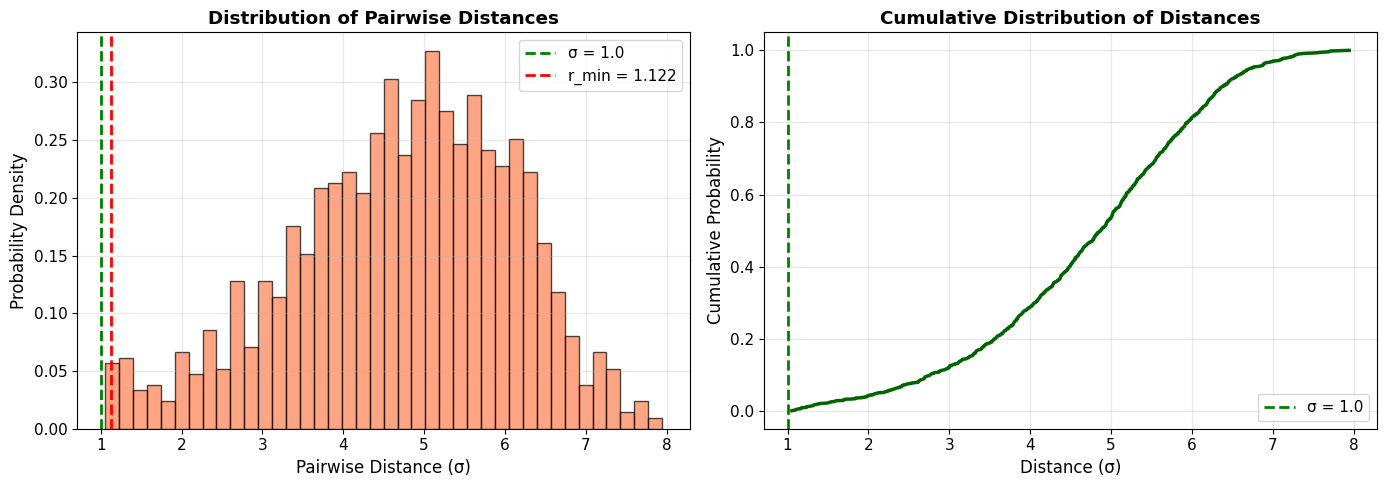

Total number of pairs: 1225
Minimum distance: 1.054 σ
Mean distance: 4.718 σ
Maximum distance: 7.945 σ
Pairs with r < σ: 0 (0.0%)


In [28]:
# Calculate all pairwise distances
positions = results['final_positions']
n = len(positions)
distances = []

for i in range(n):
    for j in range(i + 1, n):
        r_vec = positions[i] - positions[j]
        # Apply periodic boundaries
        r_vec = r_vec - params.box_length * np.round(r_vec / params.box_length)
        distances.append(np.linalg.norm(r_vec))

distances = np.array(distances)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of distances
ax1.hist(distances, bins=40, density=True, alpha=0.7, color='coral', edgecolor='black')
ax1.axvline(params.sigma, color='green', linestyle='--', linewidth=2, label=f'σ = {params.sigma}')
ax1.axvline(params.sigma * 2**(1/6), color='red', linestyle='--', linewidth=2, 
           label=f'r_min = {params.sigma * 2**(1/6):.3f}')
ax1.set_xlabel('Pairwise Distance (σ)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Distribution of Pairwise Distances', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Cumulative distribution
sorted_dist = np.sort(distances)
cumulative = np.arange(1, len(sorted_dist) + 1) / len(sorted_dist)
ax2.plot(sorted_dist, cumulative, linewidth=2.5, color='darkgreen')
ax2.axvline(params.sigma, color='green', linestyle='--', linewidth=2, label=f'σ = {params.sigma}')
ax2.set_xlabel('Distance (σ)', fontsize=12)
ax2.set_ylabel('Cumulative Probability', fontsize=12)
ax2.set_title('Cumulative Distribution of Distances', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total number of pairs: {len(distances)}")
print(f"Minimum distance: {np.min(distances):.3f} σ")
print(f"Mean distance: {np.mean(distances):.3f} σ")
print(f"Maximum distance: {np.max(distances):.3f} σ")
print(f"Pairs with r < σ: {np.sum(distances < params.sigma)} ({100*np.sum(distances < params.sigma)/len(distances):.1f}%)")

## 11. Interactive: Try Your Own Parameters!

Modify the parameters below and run the cell to explore different conditions.

Running custom simulation with:
  N = 30, T = 1.5, ρ = 0.0300

Starting MCMC simulation...
Particles: 30
Temperature: 1.5
Steps: 8000
Equilibration: 1600

Equilibration phase...
Production phase...
Production phase...
Step 1000/8000, Energy: -7.73, Acceptance: 0.914
Step 1000/8000, Energy: -7.73, Acceptance: 0.914
Step 2000/8000, Energy: -6.55, Acceptance: 0.926
Step 2000/8000, Energy: -6.55, Acceptance: 0.926
Step 3000/8000, Energy: -5.37, Acceptance: 0.928
Step 3000/8000, Energy: -5.37, Acceptance: 0.928
Step 4000/8000, Energy: -5.79, Acceptance: 0.925
Step 4000/8000, Energy: -5.79, Acceptance: 0.925
Step 5000/8000, Energy: -9.00, Acceptance: 0.923
Step 5000/8000, Energy: -9.00, Acceptance: 0.923
Step 6000/8000, Energy: -5.07, Acceptance: 0.926
Step 6000/8000, Energy: -5.07, Acceptance: 0.926
Step 7000/8000, Energy: -8.35, Acceptance: 0.920
Step 7000/8000, Energy: -8.35, Acceptance: 0.920
Step 8000/8000, Energy: -9.13, Acceptance: 0.915

Simulation complete!
Final acceptance rate: 0.

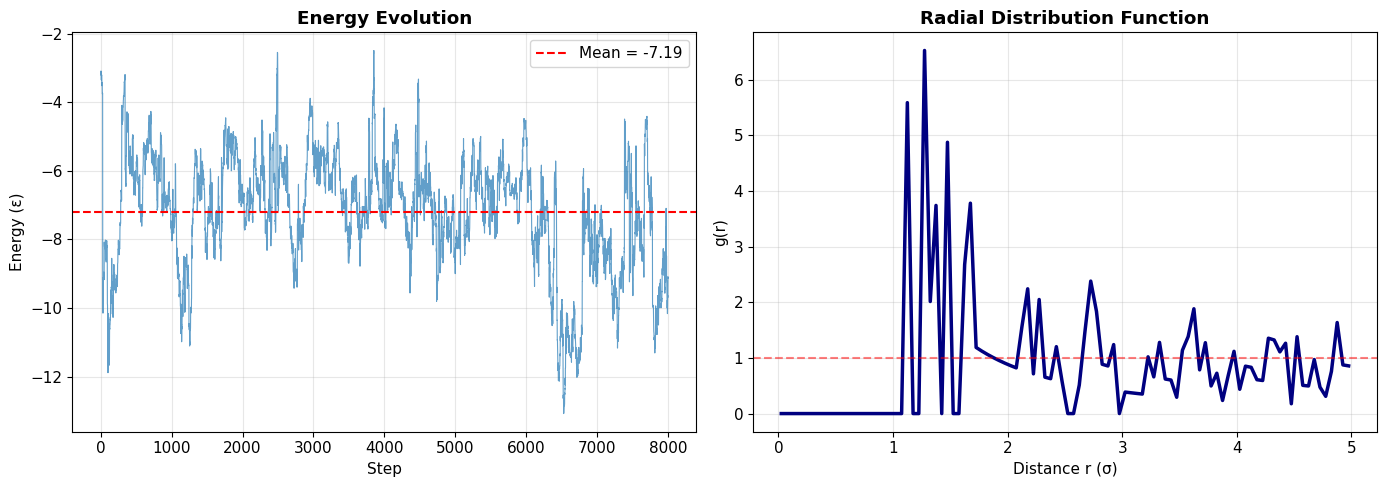

In [29]:
# ========== MODIFY THESE PARAMETERS ==========
n_particles_custom = 30        # Number of particles
box_length_custom = 10.0       # Box size
temperature_custom = 1.5       # Temperature
max_displacement_custom = 0.3  # Max move size
n_steps_custom = 8000          # Total steps
# ============================================

np.random.seed(np.random.randint(1000))  # Random seed each time

params_custom = mcmc.SimulationParameters(
    n_particles=n_particles_custom,
    box_length=box_length_custom,
    temperature=temperature_custom,
    max_displacement=max_displacement_custom,
    n_steps=n_steps_custom,
    equilibration_steps=max(1000, n_steps_custom // 5)
)

print(f"Running custom simulation with:")
print(f"  N = {n_particles_custom}, T = {temperature_custom}, ρ = {n_particles_custom/box_length_custom**3:.4f}")
print()

system_custom = mcmc.LennardJonesSystem(params_custom)
results_custom = system_custom.run_simulation(verbose=True)

# Quick visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Energy evolution
ax1.plot(results_custom['energies'], alpha=0.7, linewidth=0.8)
ax1.axhline(np.mean(results_custom['energies']), color='r', linestyle='--', 
           label=f"Mean = {np.mean(results_custom['energies']):.2f}")
ax1.set_xlabel('Step')
ax1.set_ylabel('Energy (ε)')
ax1.set_title('Energy Evolution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Radial distribution
r_custom, g_custom = system_custom.get_radial_distribution_function()
ax2.plot(r_custom, g_custom, linewidth=2.5, color='navy')
ax2.axhline(1.0, color='red', linestyle='--', alpha=0.5)
ax2.set_xlabel('Distance r (σ)')
ax2.set_ylabel('g(r)')
ax2.set_title('Radial Distribution Function', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Summary and Key Takeaways

### What we learned:

1. **Lennard-Jones Potential**: Models realistic atomic/molecular interactions with repulsion at short range and attraction at intermediate range

2. **MCMC Sampling**: The Metropolis-Hastings algorithm samples configurations according to the Boltzmann distribution

3. **Temperature Effects**: 
   - Low T → ordered, solid-like structures
   - High T → disordered, gas-like behavior

4. **Radial Distribution Function**: g(r) reveals structural information:
   - Peaks indicate preferred neighbor distances
   - Sharpness indicates degree of order

5. **Equilibration**: System needs time to reach equilibrium before collecting statistics

6. **Acceptance Rate**: Should be ~30-50% for efficient sampling

### Applications:
- Studying phase transitions (solid/liquid/gas)
- Calculating thermodynamic properties
- Understanding molecular structure in liquids
- Protein folding and molecular dynamics

---

**Experiment further by modifying parameters and exploring different regimes!**